In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s_bike = pd.read_csv('SeoulBikeData.csv')
s_bike.head(10)


Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0  01/12/2017                254     0            -5.2           37   
1  01/12/2017                204     1            -5.5           38   
2  01/12/2017                173     2            -6.0           39   
3  01/12/2017                107     3            -6.2           40   
4  01/12/2017                 78     4            -6.0           36   
5  01/12/2017                100     5            -6.4           37   
6  01/12/2017                181     6            -6.6           35   
7  01/12/2017                460     7            -7.4           38   
8  01/12/2017                930     8            -7.6           37   
9  01/12/2017                490     9            -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   
5               1.5              2000                     -18.7   
6               1.3              2000                     -19.5   
7               0.9              2000                     -19.3   
8               1.1              2000                     -19.8   
9               0.5              1928                     -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [3]:
col_name = s_bike.columns.values.tolist()
col_name

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [4]:
nm_chng = {
    'Date': 'date',
    'Rented Bike Count': 'bike_count',
    'Hour': 'hour',
    'Temperature(°C)': 'temp',
    'Humidity(%)': 'humidity',
    'Wind speed (m/s)': 'wind_speed',
    'Visibility (10m)': 'visibility',
    'Dew point temperature(°C)': 'dp_temp',
    'Solar Radiation (MJ/m2)': 'solar_rad',
    'Rainfall(mm)': 'rainfall',
    'Snowfall (cm)': 'snowfall',
    'Seasons': 'seasons',
    'Holiday': 'holiday',
    'Functioning Day': 'func_day'
    }


In [5]:
s_bike.rename(columns = nm_chng, inplace = True)

In [6]:
s_bike.columns

Index(['date', 'bike_count', 'hour', 'Temperature(C)', 'humidity',
       'wind_speed', 'visibility', 'Dew point temperature(C)', 'solar_rad',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [7]:
season = s_bike['seasons'].unique()
season

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
ssn_cat = {}
for i, j in enumerate(season):
  ssn_cat[j] = i

ssn_cat


{'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}

In [9]:
s_bike['seasons'] = s_bike['seasons'].map(ssn_cat)

In [10]:
hol_cat = {'No Holiday': 0,
           'Holiday': 1}

fd_cat = {'No': 0,
          'Yes': 1}

In [11]:
s_bike['holiday'] = s_bike['holiday'].map(hol_cat)
s_bike['func_day'] = s_bike['func_day'].map(fd_cat)

In [12]:
s_bike.head(10)

date  bike_count  hour  Temperature(C)  humidity  wind_speed  \
0  01/12/2017         254     0            -5.2        37         2.2   
1  01/12/2017         204     1            -5.5        38         0.8   
2  01/12/2017         173     2            -6.0        39         1.0   
3  01/12/2017         107     3            -6.2        40         0.9   
4  01/12/2017          78     4            -6.0        36         2.3   
5  01/12/2017         100     5            -6.4        37         1.5   
6  01/12/2017         181     6            -6.6        35         1.3   
7  01/12/2017         460     7            -7.4        38         0.9   
8  01/12/2017         930     8            -7.6        37         1.1   
9  01/12/2017         490     9            -6.5        27         0.5   

   visibility  Dew point temperature(C)  solar_rad  rainfall  snowfall  \
0        2000                     -17.6       0.00       0.0       0.0   
1        2000                     -17.6       0.00       0.0       0.0   
2        2000                     -17.7       0.00       0.0       0.0   
3        2000                     -17.6       0.00       0.0       0.0   
4        2000                     -18.6       0.00       0.0       0.0   
5        2000                     -18.7       0.00       0.0       0.0   
6        2000                     -19.5       0.00       0.0       0.0   
7        2000                     -19.3       0.00       0.0       0.0   
8        2000                     -19.8       0.01       0.0       0.0   
9        1928                     -22.4       0.23       0.0       0.0   

   seasons  holiday  func_day  
0        0        0         1  
1        0        0         1  
2        0        0         1  
3        0        0         1  
4        0        0         1  
5        0        0         1  
6        0        0         1  
7        0        0         1  
8        0        0         1  
9        0        0         1

In [13]:
s_bike.describe()

bike_count         hour  Temperature(C)     humidity   wind_speed  \
count  8760.000000  8760.000000     8760.000000  8760.000000  8760.000000   
mean    704.602055    11.500000       12.882922    58.226256     1.724909   
std     644.997468     6.922582       11.944825    20.362413     1.036300   
min       0.000000     0.000000      -17.800000     0.000000     0.000000   
25%     191.000000     5.750000        3.500000    42.000000     0.900000   
50%     504.500000    11.500000       13.700000    57.000000     1.500000   
75%    1065.250000    17.250000       22.500000    74.000000     2.300000   
max    3556.000000    23.000000       39.400000    98.000000     7.400000   

        visibility  Dew point temperature(C)    solar_rad     rainfall  \
count  8760.000000               8760.000000  8760.000000  8760.000000   
mean   1436.825799                  4.073813     0.569111     0.148687   
std     608.298712                 13.060369     0.868746     1.128193   
min      27.000000                -30.600000     0.000000     0.000000   
25%     940.000000                 -4.700000     0.000000     0.000000   
50%    1698.000000                  5.100000     0.010000     0.000000   
75%    2000.000000                 14.800000     0.930000     0.000000   
max    2000.000000                 27.200000     3.520000    35.000000   

          snowfall      seasons      holiday     func_day  
count  8760.000000  8760.000000  8760.000000  8760.000000  
mean      0.075068     1.504110     0.049315     0.966324  
std       0.436746     1.114408     0.216537     0.180404  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000     1.000000  
50%       0.000000     2.000000     0.000000     1.000000  
75%       0.000000     2.000000     0.000000     1.000000  
max       8.800000     3.000000     1.000000     1.000000

In [14]:
s_bike['date'] = pd.to_datetime(s_bike['date'])

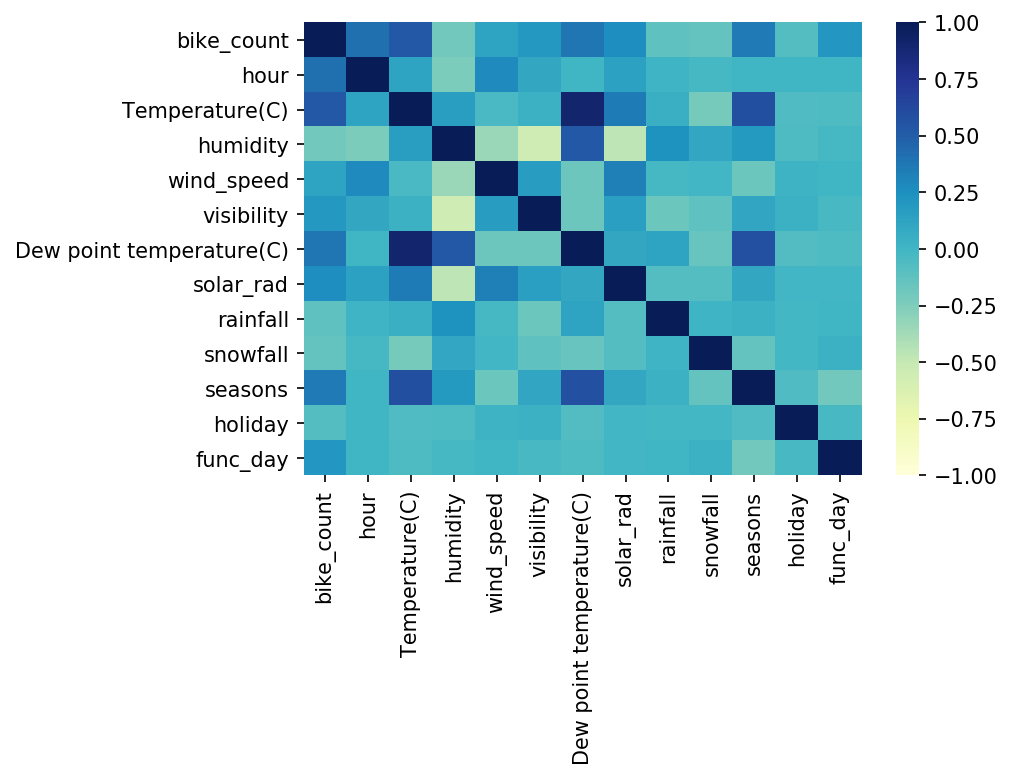

In [15]:
figure = plt.figure(dpi = 150)
sns.heatmap(s_bike.corr(), vmax = 1, vmin = -1, center = 0, cmap = 'YlGnBu')
plt.show()



In [16]:
s_bike.groupby(['seasons','holiday'])['bike_count'].mean()

seasons  holiday
0        0           232.264736
         1           156.625000
1        0           733.224251
         1           635.305556
2        0          1034.338426
         1          1022.145833
3        0           823.151163
         1           758.483333
Name: bike_count, dtype: float64

In [17]:
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      8760 non-null   datetime64[ns]
 1   bike_count                8760 non-null   int64         
 2   hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   humidity                  8760 non-null   int64         
 5   wind_speed                8760 non-null   float64       
 6   visibility                8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   solar_rad                 8760 non-null   float64       
 9   rainfall                  8760 non-null   float64       
 10  snowfall                  8760 non-null   float64       
 11  seasons                   8760 non-null   int64         
 12  holiday             

In [18]:
import datetime
year = s_bike['date'].map(lambda d: '01-01-%d' % d.year).astype('datetime64')

In [19]:
year

0      2017-01-01
1      2017-01-01
2      2017-01-01
3      2017-01-01
4      2017-01-01
          ...    
8755   2018-01-01
8756   2018-01-01
8757   2018-01-01
8758   2018-01-01
8759   2018-01-01
Name: date, Length: 8760, dtype: datetime64[ns]

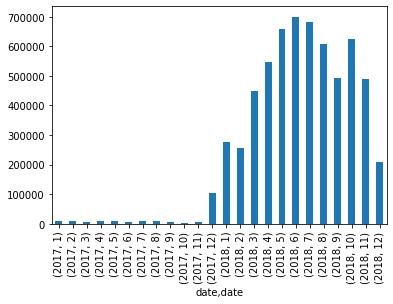

In [20]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).year,
                pd.DatetimeIndex(s_bike['date']).month])['bike_count'].sum().plot(kind = 'bar')

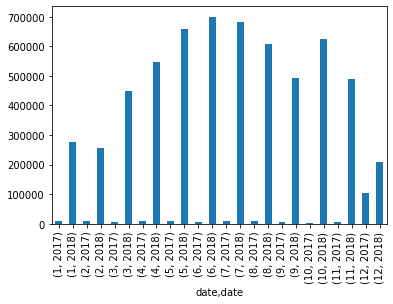

In [21]:
s_bike.groupby([pd.DatetimeIndex(s_bike['date']).month,
                pd.DatetimeIndex(s_bike['date']).year])['bike_count'].sum().plot(kind = 'bar')

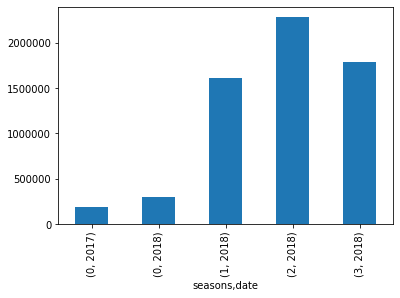

In [22]:
s_bike.groupby(['seasons',
               pd.DatetimeIndex(s_bike['date']).year])['bike_count'].sum().plot(kind = 'bar')

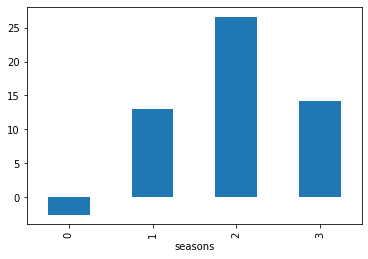

In [23]:
s_bike.groupby('seasons')['Temperature(C)'].mean().plot(kind = 'bar')
plt.show()
plt.close()


In [24]:
import datetime
day_name = []
for i in s_bike['date']:
  day_name.append(i.strftime('%A'))

s_bike['day_name'] = day_name

In [25]:
s_bike['weekdays'] = np.where(s_bike['day_name'].values == ['Friday','Saturday'], 0,1)

C:\Users\cinta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [26]:
s_bike['day_name'] == 'Sunday'

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: day_name, Length: 8760, dtype: bool

In [27]:
week_num = {'Sunday': 1,
            'Monday': 2,
            'Tuesday': 3,
            'Wednesday': 4,
            'Thursday': 5,
            'Friday': 6,
            'Saturday': 7}

s_bike['day_num'] = s_bike['day_name'].map(week_num)


In [28]:
s_bike.drop('day_name', axis = 1, inplace = True)

In [29]:
s_bike['day'] = pd.DatetimeIndex(s_bike['date']).day
s_bike['month'] = pd.DatetimeIndex(s_bike['date']).month
s_bike['year'] = pd.DatetimeIndex(s_bike['date']).year

In [30]:
s_bike.drop('date', axis = 1, inplace = True)

In [31]:
s_bike.head(10)

bike_count  hour  Temperature(C)  humidity  wind_speed  visibility  \
0         254     0            -5.2        37         2.2        2000   
1         204     1            -5.5        38         0.8        2000   
2         173     2            -6.0        39         1.0        2000   
3         107     3            -6.2        40         0.9        2000   
4          78     4            -6.0        36         2.3        2000   
5         100     5            -6.4        37         1.5        2000   
6         181     6            -6.6        35         1.3        2000   
7         460     7            -7.4        38         0.9        2000   
8         930     8            -7.6        37         1.1        2000   
9         490     9            -6.5        27         0.5        1928   

   Dew point temperature(C)  solar_rad  rainfall  snowfall  seasons  holiday  \
0                     -17.6       0.00       0.0       0.0        0        0   
1                     -17.6       0.00       0.0       0.0        0        0   
2                     -17.7       0.00       0.0       0.0        0        0   
3                     -17.6       0.00       0.0       0.0        0        0   
4                     -18.6       0.00       0.0       0.0        0        0   
5                     -18.7       0.00       0.0       0.0        0        0   
6                     -19.5       0.00       0.0       0.0        0        0   
7                     -19.3       0.00       0.0       0.0        0        0   
8                     -19.8       0.01       0.0       0.0        0        0   
9                     -22.4       0.23       0.0       0.0        0        0   

   func_day  weekdays  day_num  day  month  year  
0         1         1        5   12      1  2017  
1         1         1        5   12      1  2017  
2         1         1        5   12      1  2017  
3         1         1        5   12      1  2017  
4         1         1        5   12      1  2017  
5         1         1        5   12      1  2017  
6         1         1        5   12      1  2017  
7         1         1        5   12      1  2017  
8         1         1        5   12      1  2017  
9         1         1        5   12      1  2017

In [32]:
s_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bike_count                8760 non-null   int64  
 1   hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   humidity                  8760 non-null   int64  
 4   wind_speed                8760 non-null   float64
 5   visibility                8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   solar_rad                 8760 non-null   float64
 8   rainfall                  8760 non-null   float64
 9   snowfall                  8760 non-null   float64
 10  seasons                   8760 non-null   int64  
 11  holiday                   8760 non-null   int64  
 12  func_day                  8760 non-null   int64  
 13  weekdays                  8760 non-null   int32  
 14  day_num 

In [33]:
s_bike.corr()

bike_count          hour  Temperature(C)  humidity  \
bike_count                  1.000000  4.102573e-01        0.538558 -0.199780   
hour                        0.410257  1.000000e+00        0.124114 -0.241644   
Temperature(C)              0.538558  1.241145e-01        1.000000  0.159371   
humidity                   -0.199780 -2.416438e-01        0.159371  1.000000   
wind_speed                  0.121108  2.851967e-01       -0.036252 -0.336683   
visibility                  0.199280  9.875348e-02        0.034794 -0.543090   
Dew point temperature(C)    0.379788  3.054372e-03        0.912798  0.536894   
solar_rad                   0.261837  1.451309e-01        0.353505 -0.461919   
rainfall                   -0.123074  8.714642e-03        0.050282  0.236397   
snowfall                   -0.141804 -2.151645e-02       -0.218405  0.108183   
seasons                     0.359687 -9.516382e-18        0.591545  0.189238   
holiday                    -0.072338  1.691160e-20       -0.055931 -0.050278   
func_day                    0.203943  5.439377e-03       -0.050170 -0.020800   
weekdays                         NaN           NaN             NaN       NaN   
day_num                     0.049535 -1.094508e-17        0.006603 -0.004654   
day                         0.046849  1.598551e-19        0.080908  0.007047   
month                       0.070861  2.684858e-18        0.049683  0.047798   
year                        0.215162  0.000000e+00        0.377796  0.035925   

                          wind_speed  visibility  Dew point temperature(C)  \
bike_count                  0.121108    0.199280                  0.379788   
hour                        0.285197    0.098753                  0.003054   
Temperature(C)             -0.036252    0.034794                  0.912798   
humidity                   -0.336683   -0.543090                  0.536894   
wind_speed                  1.000000    0.171507                 -0.176486   
visibility                  0.171507    1.000000                 -0.176630   
Dew point temperature(C)   -0.176486   -0.176630                  1.000000   
solar_rad                   0.332274    0.149738                  0.094381   
rainfall                   -0.019674   -0.167629                  0.125597   
snowfall                   -0.003554   -0.121695                 -0.150887   
seasons                    -0.166834    0.111974                  0.582418   
holiday                     0.023017    0.031773                 -0.066759   
func_day                    0.005037   -0.026000                 -0.052837   
weekdays                         NaN         NaN                       NaN   
day_num                     0.021586    0.038768                  0.000802   
day                        -0.061234   -0.106859                  0.069708   
month                      -0.082069    0.077888                  0.065101   
year                       -0.003781    0.052381                  0.336350   

                          solar_rad  rainfall  snowfall       seasons  \
bike_count                 0.261837 -0.123074 -0.141804  3.596867e-01   
hour                       0.145131  0.008715 -0.021516 -9.516382e-18   
Temperature(C)             0.353505  0.050282 -0.218405  5.915453e-01   
humidity                  -0.461919  0.236397  0.108183  1.892379e-01   
wind_speed                 0.332274 -0.019674 -0.003554 -1.668339e-01   
visibility                 0.149738 -0.167629 -0.121695  1.119742e-01   
Dew point temperature(C)   0.094381  0.125597 -0.150887  5.824180e-01   
solar_rad                  1.000000 -0.074290 -0.072301  9.468096e-02   
rainfall                  -0.074290  1.000000  0.008500  3.345293e-02   
snowfall                  -0.072301  0.008500  1.000000 -1.454573e-01   
seasons                    0.094681  0.033453 -0.145457  1.000000e+00   
holiday                   -0.005077 -0.014269 -0.012591 -5.761394e-02   
func_day                  -0.007665  0.002055  0.032089 -1.960817e-01   


In [34]:
s_bike.cov()

bike_count          hour  Temperature(C)  \
bike_count                416021.733390  1.831818e+03     4149.257754   
hour                        1831.818358  4.792214e+01       10.262907   
Temperature(C)              4149.257754  1.026291e+01      142.678850   
humidity                   -2623.853782 -3.406222e+01       38.763038   
wind_speed                    80.950203  2.045964e+00       -0.448739   
visibility                 78187.849382  4.158507e+02      252.817084   
Dew point temperature(C)    3199.299111  2.761502e-01      142.400017   
solar_rad                    146.717508  8.728125e-01        3.668334   
rainfall                     -89.558657  6.806142e-02        0.677602   
snowfall                     -39.946114 -6.505309e-02       -1.139387   
seasons                      258.539368 -2.028036e-18        7.874302   
holiday                      -10.103104 -8.112144e-19       -0.144665   
func_day                      23.730746  6.793013e-03       -0.108110   
weekdays                       0.000000  0.000000e+00        0.000000   
day_num                       63.967148 -7.463173e-17        0.157912   
day                          265.814800  2.595886e-17        8.501449   
month                        157.593759  4.542801e-17        2.046272   
year                          38.690938  0.000000e+00        1.258122   

                             humidity  wind_speed     visibility  \
bike_count               -2623.853782   80.950203   78187.849382   
hour                       -34.062222    2.045964     415.850668   
Temperature(C)              38.763038   -0.448739     252.817084   
humidity                   414.627875   -7.104540   -6726.950421   
wind_speed                  -7.104540    1.073918     108.114660   
visibility               -6726.950421  108.114660  370027.323001   
Dew point temperature(C)   142.782065   -2.388639   -1403.253586   
solar_rad                   -8.171237    0.299140      79.130141   
rainfall                     5.430677   -0.023002    -115.040313   
snowfall                     0.962098   -0.001609     -32.330842   
seasons                      4.294195   -0.192670      75.906527   
holiday                     -0.221685    0.005165       4.185096   
func_day                    -0.076408    0.000942      -2.853224   
weekdays                     0.000000    0.000000       0.000000   
day_num                     -0.189730    0.044787      47.215218   
day                          1.262344   -0.558217    -571.810417   
month                        3.355910   -0.293250     163.365306   
year                         0.203943   -0.001092       8.883365   

                          Dew point temperature(C)   solar_rad    rainfall  \
bike_count                             3199.299111  146.717508  -89.558657   
hour                                      0.276150    0.872813    0.068061   
Temperature(C)                          142.400017    3.668334    0.677602   
humidity                                142.782065   -8.171237    5.430677   
wind_speed                               -2.388639    0.299140   -0.023002   
visibility                            -1403.253586   79.130141 -115.040313   
Dew point temperature(C)                170.573247    1.070865    1.850620   
solar_rad                                 1.070865    0.754720   -0.072813   
rainfall                                  1.850620   -0.072813    1.272819   
snowfall                                 -0.860668   -0.027432    0.004188   
seasons                                   8.476852    0.091664    0.042059   
holiday                                  -0.188799   -0.000955   -0.003486   
func_day                                 -0.124492   -0.001201    0.000418   
weekdays                                  0.000000    0.000000    0.000000   
day_num                                   0.020979    0.033255   -0.027784   
day                                       8.008642   -0.026331    0.119076   
month                 

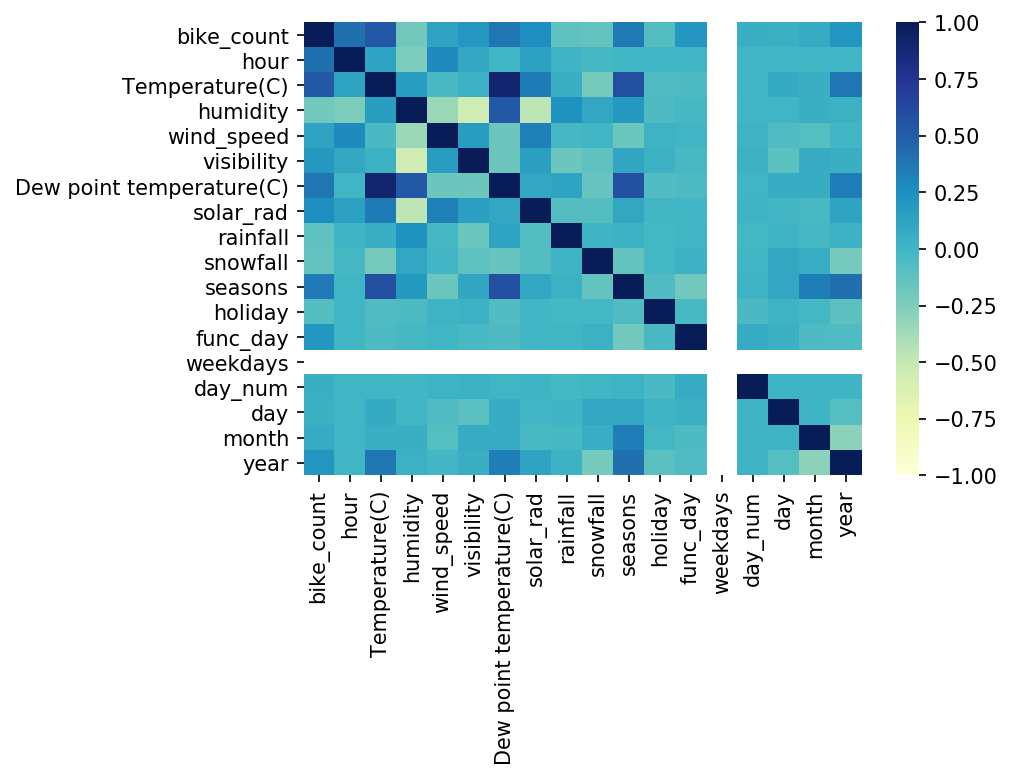

In [35]:
figure = plt.figure(dpi = 150)
sns.heatmap(s_bike.corr(), vmax = 1, vmin = -1, center = 0, cmap = 'YlGnBu')
plt.show()
plt.close()


In [36]:
Y = s_bike['bike_count']
X = s_bike.drop('bike_count', axis = 1)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [38]:
Y.head(10)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
9    490
Name: bike_count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate


In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .30,
                                                    random_state = 50)

In [41]:
rc = RandomForestRegressor(n_estimators= 100, criterion= 'mse')

In [42]:
rc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
print(rc.score)

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>


In [44]:
cv = cross_validate(rc, x_train, y_train, cv = 10)

In [45]:
cv

{'fit_time': array([5.41293788, 5.39713836, 5.43528962, 5.41939998, 5.47328901,
        5.45575714, 5.43047953, 5.39279938, 5.40171337, 5.36751199]),
 'score_time': array([0.03124905, 0.04033446, 0.040591  , 0.04052162, 0.04046893,
        0.03603911, 0.04040217, 0.04169202, 0.0341537 , 0.04687357]),
 'test_score': array([0.89689631, 0.88547447, 0.87926105, 0.8776227 , 0.91124484,
        0.89462282, 0.88679403, 0.88762857, 0.9051283 , 0.86537317])}

In [46]:
pred = rc.predict(x_test)

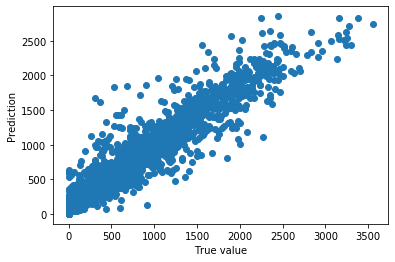

In [47]:
plt.scatter(y_test, pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()


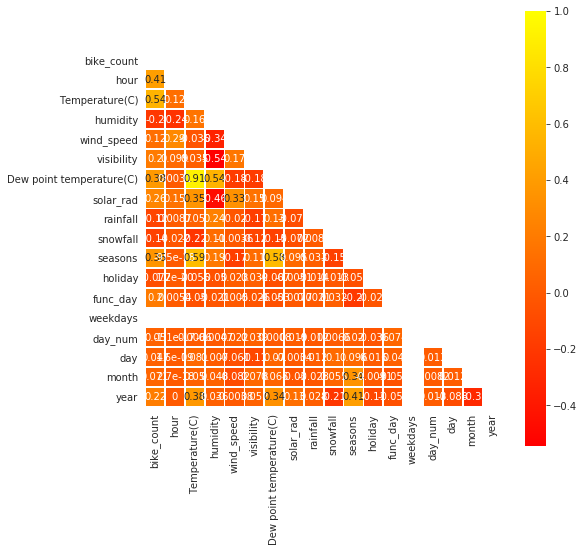

In [48]:
#correlation
corr = s_bike.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn",annot=True)

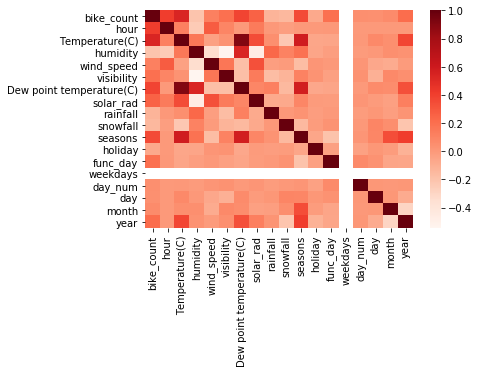

In [50]:
sns.heatmap(s_bike.corr(),cmap="Reds")

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr

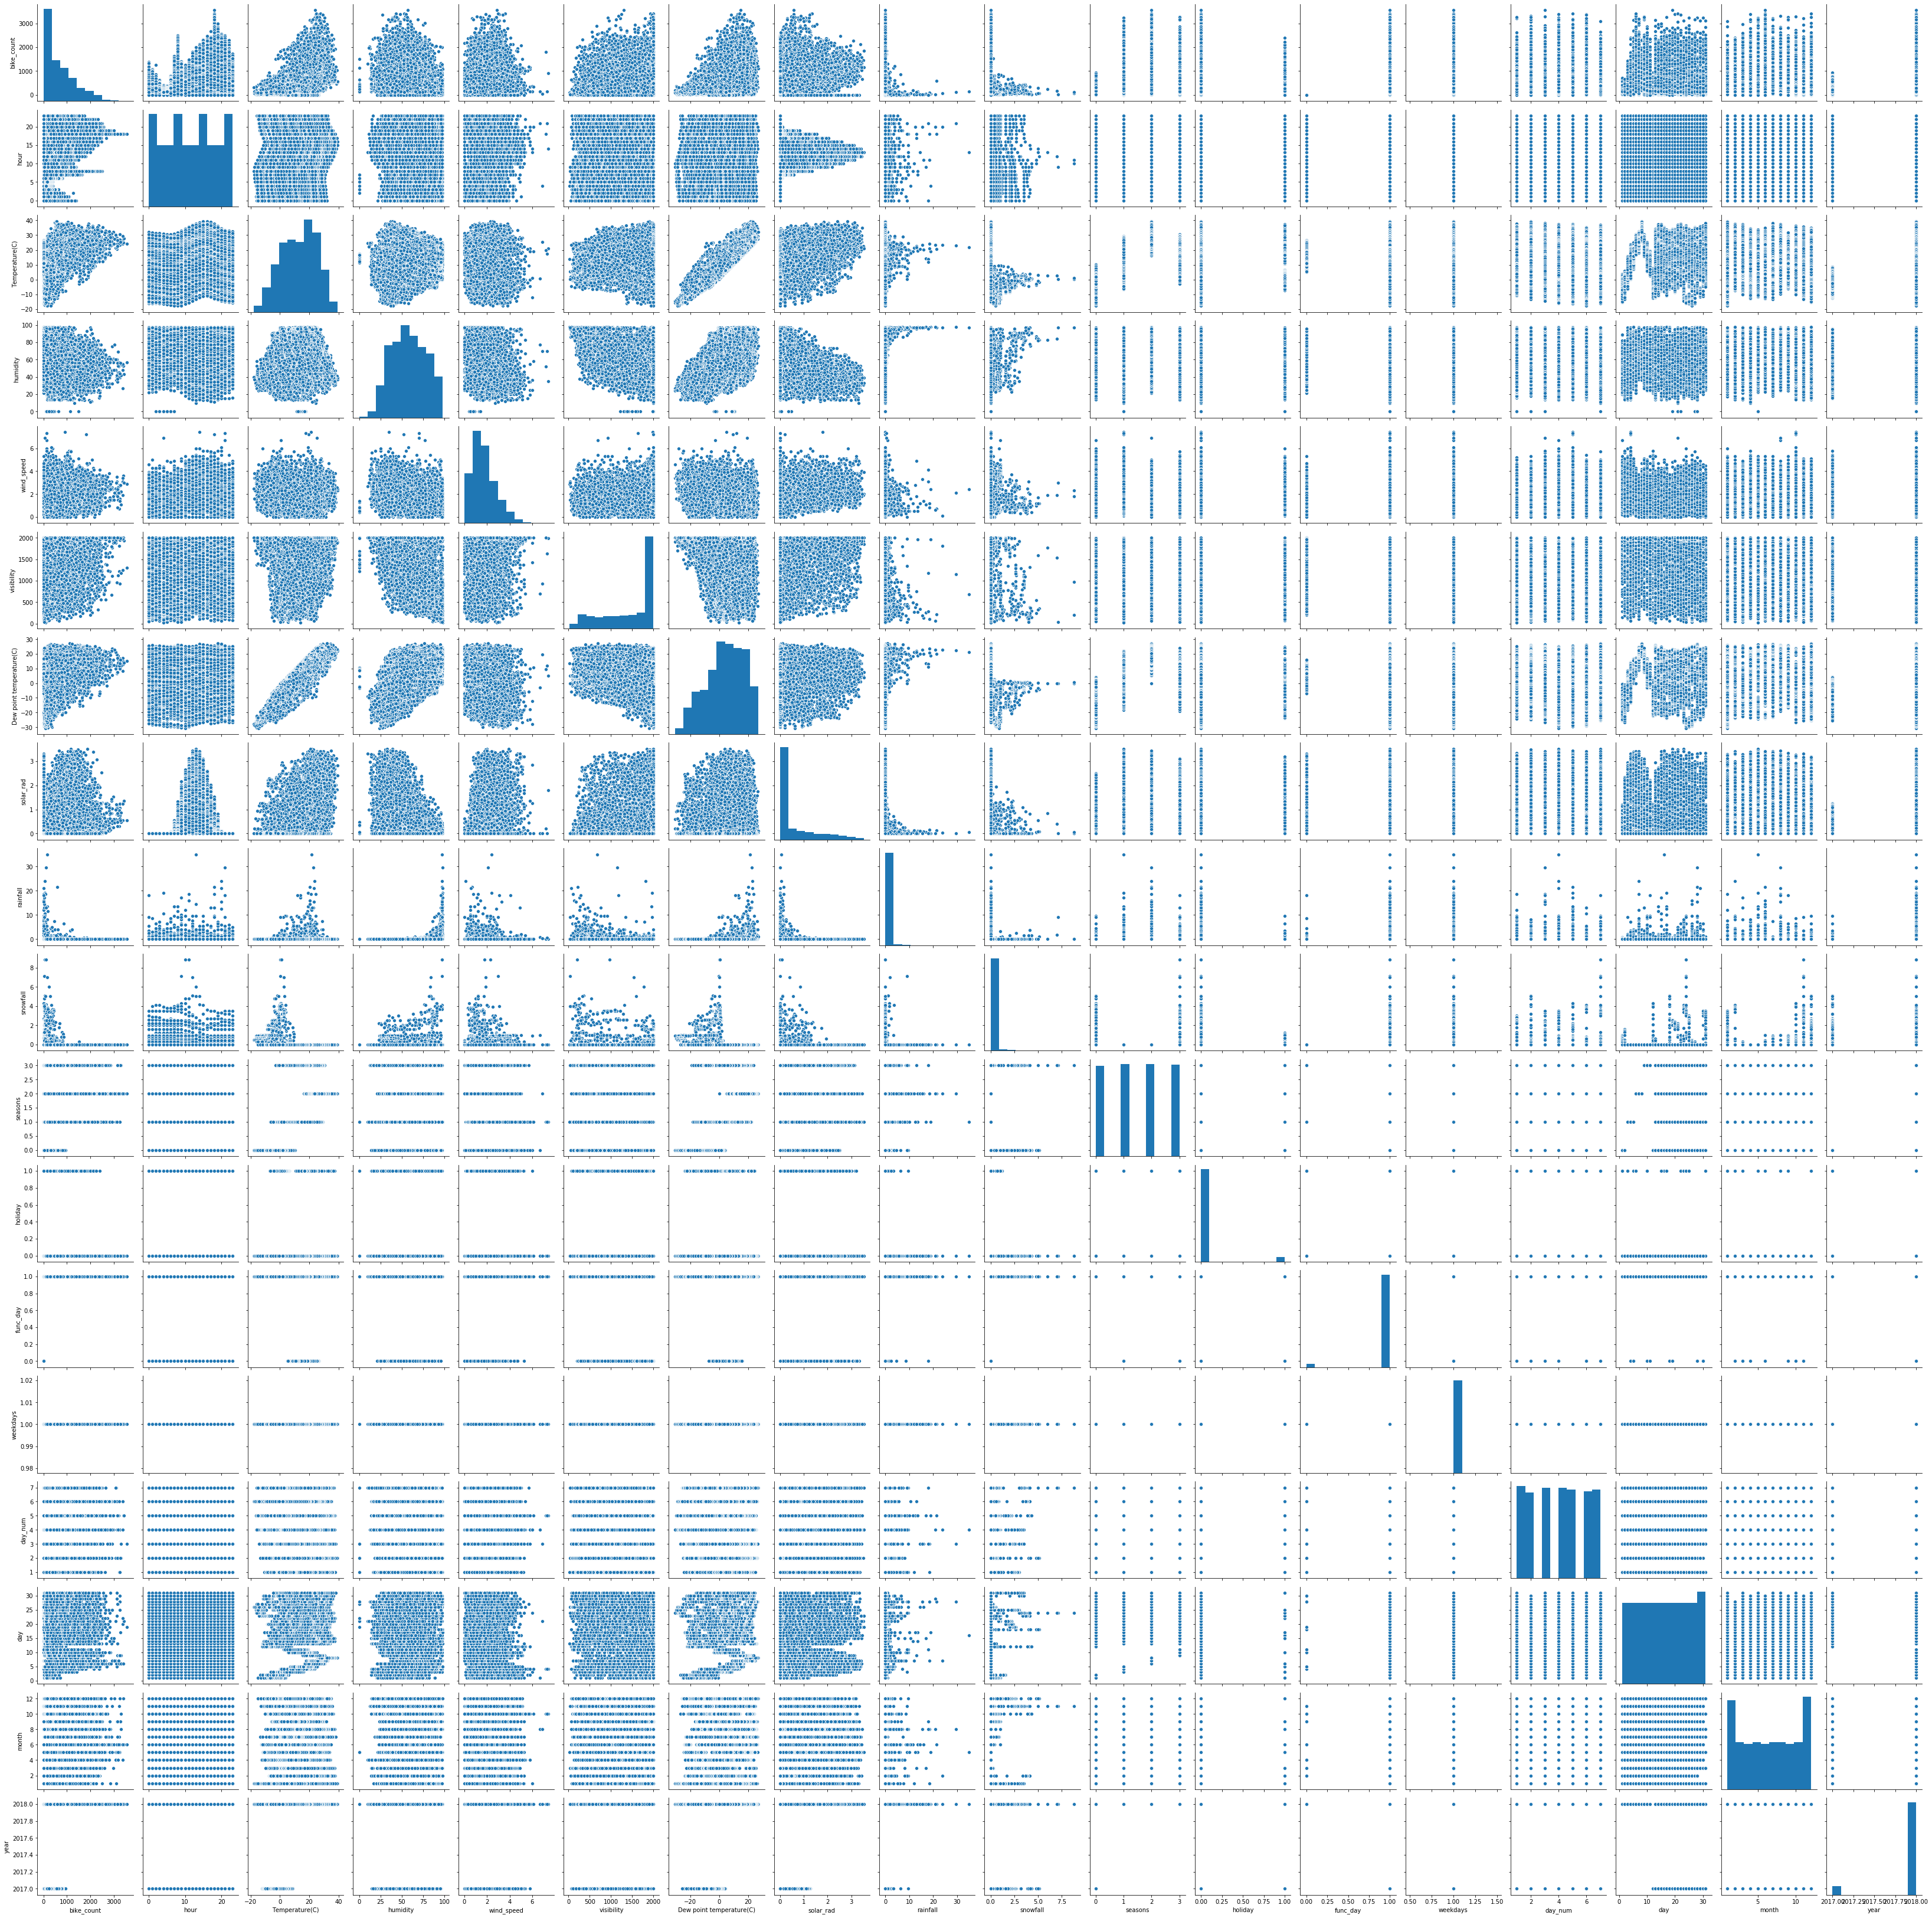

In [52]:
sns.pairplot(s_bike)

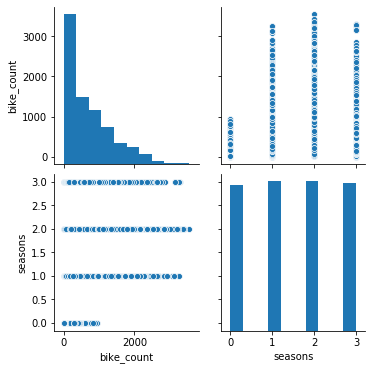

In [53]:
x= s_bike[['bike_count','seasons']]
sns.pairplot(x)

In [54]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['seasons'])

(0.3596866862858997, 7.871689444120444e-266)

In [55]:
np.corrcoef(s_bike['bike_count'],s_bike['seasons'])

array([[1.        , 0.35968669],
       [0.35968669, 1.        ]])

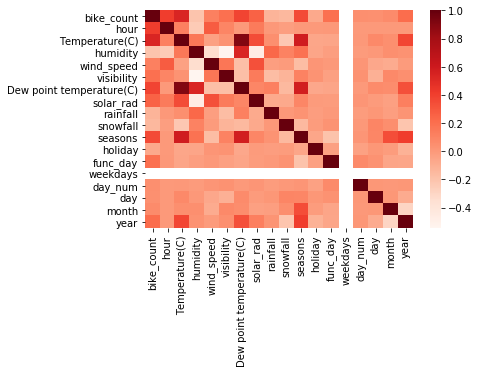

In [56]:
sns.heatmap(s_bike.corr(),cmap="Reds")

In [57]:
s_bike.corr()

bike_count          hour  Temperature(C)  humidity  \
bike_count                  1.000000  4.102573e-01        0.538558 -0.199780   
hour                        0.410257  1.000000e+00        0.124114 -0.241644   
Temperature(C)              0.538558  1.241145e-01        1.000000  0.159371   
humidity                   -0.199780 -2.416438e-01        0.159371  1.000000   
wind_speed                  0.121108  2.851967e-01       -0.036252 -0.336683   
visibility                  0.199280  9.875348e-02        0.034794 -0.543090   
Dew point temperature(C)    0.379788  3.054372e-03        0.912798  0.536894   
solar_rad                   0.261837  1.451309e-01        0.353505 -0.461919   
rainfall                   -0.123074  8.714642e-03        0.050282  0.236397   
snowfall                   -0.141804 -2.151645e-02       -0.218405  0.108183   
seasons                     0.359687 -9.516382e-18        0.591545  0.189238   
holiday                    -0.072338  1.691160e-20       -0.055931 -0.050278   
func_day                    0.203943  5.439377e-03       -0.050170 -0.020800   
weekdays                         NaN           NaN             NaN       NaN   
day_num                     0.049535 -1.094508e-17        0.006603 -0.004654   
day                         0.046849  1.598551e-19        0.080908  0.007047   
month                       0.070861  2.684858e-18        0.049683  0.047798   
year                        0.215162  0.000000e+00        0.377796  0.035925   

                          wind_speed  visibility  Dew point temperature(C)  \
bike_count                  0.121108    0.199280                  0.379788   
hour                        0.285197    0.098753                  0.003054   
Temperature(C)             -0.036252    0.034794                  0.912798   
humidity                   -0.336683   -0.543090                  0.536894   
wind_speed                  1.000000    0.171507                 -0.176486   
visibility                  0.171507    1.000000                 -0.176630   
Dew point temperature(C)   -0.176486   -0.176630                  1.000000   
solar_rad                   0.332274    0.149738                  0.094381   
rainfall                   -0.019674   -0.167629                  0.125597   
snowfall                   -0.003554   -0.121695                 -0.150887   
seasons                    -0.166834    0.111974                  0.582418   
holiday                     0.023017    0.031773                 -0.066759   
func_day                    0.005037   -0.026000                 -0.052837   
weekdays                         NaN         NaN                       NaN   
day_num                     0.021586    0.038768                  0.000802   
day                        -0.061234   -0.106859                  0.069708   
month                      -0.082069    0.077888                  0.065101   
year                       -0.003781    0.052381                  0.336350   

                          solar_rad  rainfall  snowfall       seasons  \
bike_count                 0.261837 -0.123074 -0.141804  3.596867e-01   
hour                       0.145131  0.008715 -0.021516 -9.516382e-18   
Temperature(C)             0.353505  0.050282 -0.218405  5.915453e-01   
humidity                  -0.461919  0.236397  0.108183  1.892379e-01   
wind_speed                 0.332274 -0.019674 -0.003554 -1.668339e-01   
visibility                 0.149738 -0.167629 -0.121695  1.119742e-01   
Dew point temperature(C)   0.094381  0.125597 -0.150887  5.824180e-01   
solar_rad                  1.000000 -0.074290 -0.072301  9.468096e-02   
rainfall                  -0.074290  1.000000  0.008500  3.345293e-02   
snowfall                  -0.072301  0.008500  1.000000 -1.454573e-01   
seasons                    0.094681  0.033453 -0.145457  1.000000e+00   
holiday                   -0.005077 -0.014269 -0.012591 -5.761394e-02   
func_day                  -0.007665  0.002055  0.032089 -1.960817e-01   


In [58]:
s_bike.corr().style.background_gradient(cmap='coolwarm')

C:\Users\cinta\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\cinta\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\cinta\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


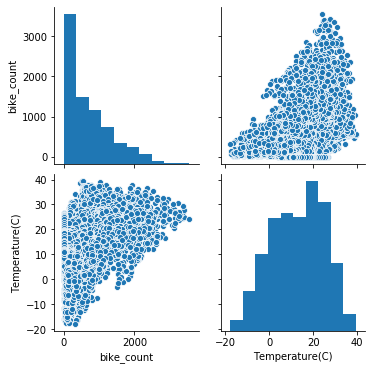

In [59]:
x= s_bike[['bike_count','Temperature(C)']]
sns.pairplot(x)

In [60]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['Temperature(C)'])

(0.5385581530139791, 0.0)

In [61]:
np.corrcoef(s_bike['bike_count'],s_bike['Temperature(C)'])

array([[1.        , 0.53855815],
       [0.53855815, 1.        ]])

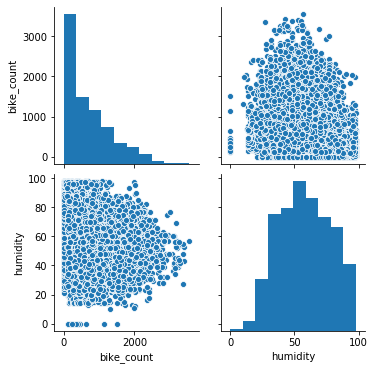

In [62]:
x= s_bike[['bike_count','humidity']]
sns.pairplot(x)

In [63]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['humidity'])

(-0.1997801670008983, 1.475065103111145e-79)

In [64]:
np.corrcoef(s_bike['bike_count'],s_bike['humidity'])

array([[ 1.        , -0.19978017],
       [-0.19978017,  1.        ]])

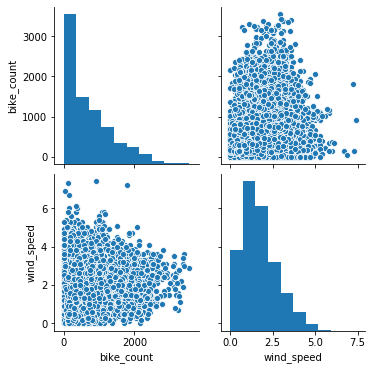

In [65]:
x= s_bike[['bike_count','wind_speed']]
sns.pairplot(x)

In [66]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['wind_speed'])

(0.1211084481883867, 5.5445615603665625e-30)

In [67]:
np.corrcoef(s_bike['bike_count'],s_bike['wind_speed'])

array([[1.        , 0.12110845],
       [0.12110845, 1.        ]])

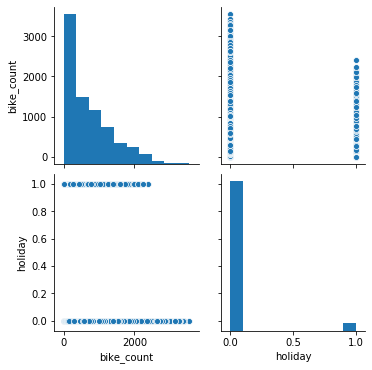

In [68]:
x= s_bike[['bike_count','holiday']]
sns.pairplot(x)

In [69]:
scipy.stats.pearsonr(s_bike['bike_count'],s_bike['holiday'])

(-0.07233756694331486, 1.2156443234863755e-11)

In [70]:
np.corrcoef(s_bike['bike_count'],s_bike['holiday'])

array([[ 1.        , -0.07233757],
       [-0.07233757,  1.        ]])

In [71]:
#This dataset contains weather information(Temperature, humidity, windspeed, visibility, dewpoint, solar radiation, snowfall, rainfall) the no.of bikes rented per hour and date information.
#Independent variables are datetime,season,holiday,working day, weather, temp, atemp, humidity, windspeed
#dependent variables are No.of total rentals, no. of registered users, no. of non registered users
#Temperature or hour was ranked as the most influential variable to predict the rated bike demand at each hour.

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
s_bike['func_day'] = s_bike['func_day'].apply(lambda x: 1 if x=='yes' else 0)
s_bike['func_day'].value_counts()

0    8760
Name: func_day, dtype: int64

In [75]:
s_bike.columns

Index(['bike_count', 'hour', 'Temperature(C)', 'humidity', 'wind_speed',
       'visibility', 'Dew point temperature(C)', 'solar_rad', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'weekdays', 'day_num',
       'day', 'month', 'year'],
      dtype='object')

In [77]:
x = s_bike[['bike_count','hour','Temperature(C)','humidity','wind_speed','visibility','Dew point temperature(C)','solar_rad','rainfall','snowfall']]

In [78]:
y = s_bike['func_day']

In [79]:
model = LogisticRegression()